In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# ~Bendita~ Inferência Bayesiana

P1: 24/09 (40%)

P2: 19/11 (40%)

Trabalhos em aula (20%)


| <h2>Ai, meu senhor... </h2>|
|:--------:|
|<img src="https://i.pinimg.com/236x/61/4b/54/614b54476b6c322fe8bbaf1c7e999afa.jpg" width="200" height="100">|


# Definições

## Inferência Bayesiana

Na inferência clássica, supomos uma distribuição com parâmetros e realizamos conclusões sobre os parâmetros a partir dos dados, onde o parâmetro é um valor. Na bayesiana, o parâmetro é uma quantidade aleatória que pode assumir um certo domínio de valores, o que leva a abordagens diferentes de modelagem.
Essencialmente, a inferência vai ser baseada em $f(\theta|y)$ em vez de $f(y|\theta)$, ou seja, na probabilidade do parâmetro dado que ocorreu tal valor de $y$. Precisa-se, para isso, definir a probabilidade $\mathcal{a \, priori}$. Não há um consenso sobre qual o melhor método, você pode ODIAR bayesiana ou AMAR.

## Distribuição a priori 

É algo que você assume a priori. No caso, é a distribuição que você assume que o parâmetro a ser estimado $\theta$ segue.

Já a distribuição a posteriori, é a distribuição

## Distribuição Condicional

Seja $X$ a v.a. cujo valor queremos estimar (parâmetro $\theta$) e $Y$ a v.a. observada, temos,

$$
P(X = x| Y = y) = \frac{P(X=x, Y=y)}{P(Y=y)}
$$

$$
P_{X|Y}(x|y) = \frac{P_{Y|X}(y|x) P_X(x)}{P_Y(y)}
$$

Temos

$$
P_Y(y) = \int_{-\infty}^{\infty}\, P_{Y|X}(y|x)\, P_X(x) \,dx
$$


Exemplo: Sabe-se $X$ ~ $uniform(0,1)$. Suponha que sabemos

$$
Y|X = x \text{ ~ geometric(x)}
$$

Qual a distribuição a posteriori de X dado Y=2 $f_{X|Y}(x|2)$?

R: Sabemos que

$$
f_{X|Y}(x|2) = \frac{P_{Y|X}(2|x) P_X(x)}{P_Y(2)}
$$

Temos

$$
P_{Y|X}(2|x) = x(1-x)^{y-1} = x(1-x)
$$

E

$$
P_X(x) = 1, \, 0 \leq x \leq 1
$$

$$
P_Y(2) = \int_{-\infty}^{\infty}\, P_{Y|X}(2|x)\, P_X(x) \,dx = \int_{0}^{1} x(1-x).1 dx = \frac{1}{6}
$$

E, finalmente

$$
P_{X|Y}(x|2) = \frac{P_{Y|X}(2|x) P_X(x)}{P_Y(2)} = \frac{x(1-x)}{\frac{1}{6}} = 6x(1-x)
$$


Exemplo: Suponha n lançamentos de uma moeda enviesada, com $x_1, x_2,...,x_n$ onde  $x_i = 1$ se caiu cara e $x_i = 0$, caso contrário, e $\theta$ é a probabilidade de cair cara. Suponha também que a distribuição a priori de $\theta$ é uma uniforme $Uni(0,1)$ (ou seja, não temos conhecimento nenhum a respeito de $\theta$) e que a distribuição condicional de $\theta$ dado {$x_i$} são independentes e com distribuição $Ber(\theta)$. A verossimilhança bayesiana é

$$
f(x|\theta) = \prod_{i=1}^n \theta^{x_i} (1-\theta)^{1 - x_i} = \theta^{\sum_{i=1}^n x_i} (1-\theta)^{n - \sum_{i=1}^n x_i}
$$

Este é o núcleo de uma Beta. Uma Beta com parâmetros $\alpha$ e $\beta$ é definida por ser uma v.a. limitada ao intervalo $(0,1)$. Uma v.a. X tem distribuição Beta se sua f.d.p, com parâmetros $\alpha > 0$ e $\beta > 0$ é dada por

$$
f_X(x) = \frac{x^{\alpha - 1} (1-y)^{\beta - 1}}{B(\alpha,\beta)}, 0<y<1
$$

Onde

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

Esperança

$$
E(X) = \frac{\alpha}{\alpha + \beta}
$$

Variância

$$
V(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta +1)}
$$

Notação:
X ~ Beta($\alpha$, $\beta$)

Logo, a distribuição do exemplo acima é $Beta(1 + \sum_{i=1}^n x_i, n+1 -\sum_{i=1}^n x_i)$

In [41]:
def gama(a):
    return(math.gamma(a))

def dist_gama(a,b,fim):
    suporte = np.linspace(0,fim,10000)
    soma, p = 0, 0
    p_x, p_acum = [], []
    
    for i in suporte:
        p = ((b**a)/(gama(a)))*i**(a-1)*math.e**(-i*b)
        soma = soma + p
        p_x.append(p)
        p_acum.append(soma)
    
    de = pd.DataFrame({
            'x':suporte, 
            'p_x': p_x, 
            'p_acum': p_acum
        })

    print(f'A esperança da v.a. Gama é: {a/b} e a v.a. tem variância {a/(b**2)}')
    return de

def beta(a,b):
    return(gama(a)*gama(b)/gama(a+b))

def dist_beta(a,b):
    suporte = np.linspace(0,0.99,100)
    soma, p = 0, 0
    p_x, p_acum = [], []
    
    for i in suporte:
        p = i**(a - 1)*(1-i)**(b-1)/beta(a,b)
        soma = soma + p
        p_x.append(p)
        p_acum.append(soma)
    
    de = pd.DataFrame({
            'x':suporte, 
            'p_x': p_x, 
            'p_acum': p_acum
        })

    print(f'A esperança da v.a. Beta é: {a/(a+b)} e a v.a. tem variância {a*b/((a+b)**2*(a+b+1))}')
    return de

A esperança da v.a. Beta é: 0.22727272727272727 e a v.a. tem variância 0.007635644987423643
A esperança da v.a. Beta é: 0.2727272727272727 e a v.a. tem variância 0.008623787279913761
A esperança da v.a. Beta é: 0.45454545454545453 e a v.a. tem variância 0.010779734099892203
A esperança da v.a. Beta é: 0.7727272727272727 e a v.a. tem variância 0.007635644987423643


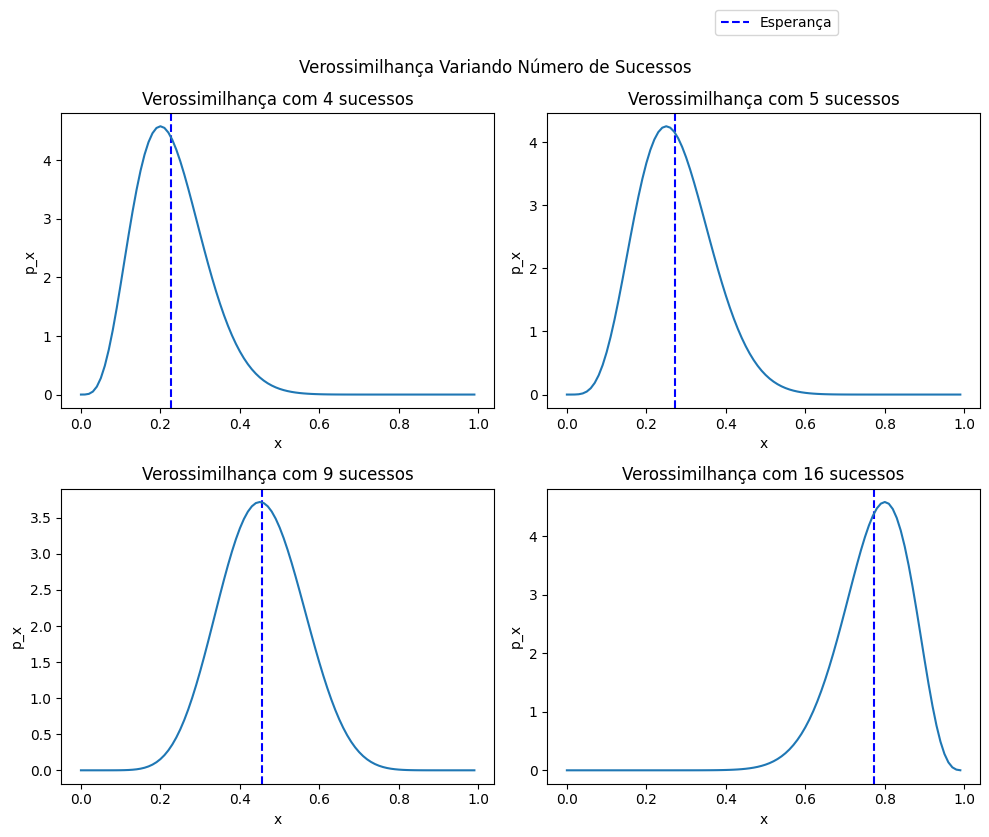

In [9]:
# Vendo as verossimilhanças variando numero de sucessos

n = 20

sucessos = [4, 5, 9, 16]

cols = [f'Verossimilhança com {i} sucessos' for i in sucessos]

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 8))

cont_b = 0
for ax in axs.flatten():
    
    a = sucessos[cont_b]+1
    b = n +1 - sucessos[cont_b]

    ax.axvline(x=a/(a+b), color='b', linestyle='--', label='Esperança')
    ax.set_title(f'{cols[cont_b]}')

    sns.lineplot(data = dist_beta(a,b), x = 'x', y = 'p_x', ax = ax)
    ax.legend_.remove() if hasattr(ax, 'legend_') and ax.legend_ else None

    cont_b += 1

fig.suptitle('Verossimilhança Variando Número de Sucessos')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=3, bbox_to_anchor=(0.85, 1))

plt.tight_layout()

## Lista 1 - Canchito

1) Se $\theta = 1$, você tem doença, caso contrário $\theta=0$. A probabilidade de você ter é 0,7. Você realizou um teste X, onde $X = 1$ se positivo e $X=0$ se negativo. A distribuição de $X$ condicionado a $\theta$ é:

$$
P(X=1|\theta=0) = 0,04 \, \, P(X=1|\theta=1) = 0,95
$$

a) Seu teste deu positivo, qual a probabilidade de você ter a doença?

$$
P(\theta = 1| X=1) = \frac{P(X=1|\theta=1)P(\theta=1)}{P(X=1)} = \frac{P(X=1|\theta=1)P(\theta=1)}{P(X=1|\theta=0)P(\theta=0) + P(X=1|\theta=1)P(\theta=1)}= \frac{0,95*0,7}{0,04*0,3 + 0,95*0,7} = 0,9823 = 98,23\%
$$

b) Aplicou novo teste, $P(Y=1|\theta=0) = 0,04$ e $P(Y=1|\theta=1) = 0,99$. Qual a distribuição preditiva?

A nossa priori virou a posteriori do exercício anterior, então a preditiva é

$$
P(\theta|Y=0, X=1) \propto P(Y=0|\theta) P(\theta|X =1) = P(Y=0|\theta=0)P(\theta=0|X=1) + P(Y=0|\theta=1)P(\theta=1|X=1)
$$

c) Deu $Y=0$, qual a prob do paciente ter a doença?

$$
P(\theta = 1| Y=0, X=1) = \frac{P(Y=0| \theta=1) P(\theta=1|X=1)}{P(Y=0| \theta=1) P(\theta=1|X=1) + P(Y=0| \theta=0) P(\theta=0|X=1)}
$$

Sabemos que 

$$
P(Y=0|\theta=1)P(\theta=1|X=1) = (1-0.99)*0.9823
$$

$$
P(Y=0|\theta=0) = 0.96
$$

$$
P(\theta=0|X=1) = \frac{P(X=1|\theta=0)P(\theta=0)}{P(X=1)} = \frac{0.04*0.3}{0.04*0.3 + 0.95*0.7} = 0.0177
$$

Logo

$$
P(\theta = 1| Y=0, X=1) = \frac{P(Y=0| \theta=1) P(\theta=1|X=1)}{P(Y=0| \theta=1) P(\theta=1|X=1) + P(Y=0| \theta=0) P(\theta=0|X=1)} = \frac{(1-0.99)*0.9823}{ (1-0.99)*0.9823 + 0.96*0.0177} = 0,3663 = 36,63\%
$$

In [16]:
0.04*0.3/(0.04*0.3 + 0.95*0.7)

0.01772525849335303

In [17]:
0.01*0.9823/(0.01*0.9823 + 0.96*0.0177)

0.3663248181987694

2. O tempo de falha de um novo componente eletrônico segue uma exponencial de parâmetro $\theta$:

$$
T \text{ ~ } Exp(\theta)
$$

Para avaliar a confiabilidade do novo componente, a empresa testou n=5 unidades verificando os seguintes tempos:

$$
t = {800, 1200, 1200, 1500, 1100}
$$

A incerteza inicial sobre $\theta$ é modelada como uma gama com parâmetros a=2 e b=2000:

$$
\theta \text{ ~ } Gama(2,2000)
$$

$$
f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-x\beta}, \text{ se } x > 0
$$

Esperança

Dado que a Gama é a soma de $\alpha$ v.a. exponenciais Y com E($Y_i$) = $\beta$, temos
$$
E(X) = E(\sum_{i = 1}^{\alpha} Y_i) = \sum_{i = 1}^{\alpha} E(Y_i) = \alpha*\beta
$$

Variância
Analogamente, a variância é calculada dada as variâncias da v.a. independentes Var($X_i$) = $\frac{\alpha}{\beta^2}$
 
$$
Var(X) = Var(\sum_{i = 1}^{\alpha} Y_i) = \sum_{i = 1}^{\alpha} Var(Y_i) = \frac{\alpha}{\beta^2}
$$

Notação:
X ~ Gama($\alpha$, $\beta$)

a) Qual $\theta|T$?

A verossimilhança é

$$
L(\theta|t) =  \prod_{i=1}^n \theta*e^{-theta*t_i} = \theta^n * e^{-theta \sum-{i=1}^n t_i}
$$

E a priori é uma gama:

$$
f(\theta; \alpha=2, \beta=2000) = \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha-1} e^{-\theta\beta} = \frac{2000^2}{\Gamma(2)} \theta e^{-2000\theta}
$$

Logo, a posteriori de $\theta$ é

$$
f_{\theta|t} \propto \theta^n * e^{-theta \sum-{i=1}^n t_i} \frac{2000^2}{\Gamma(2)} \theta e^{-2000\theta} = e^{-theta (2000 + \sum-{i=1}^n t_i)} \theta^{n+1}
$$

Generalizando para quaisquer parâmetros $\alpha$ e $\beta$:

$$
f_{\theta|t} \propto \theta^n * e^{-theta \sum-{i=1}^n t_i} \theta^{\alpha-1} e^{-\theta\beta} = e^{\theta (\beta + \sum-{i=1}^n t_i) \theta^{n + \alpha - 1}}
$$

Isso é o núcleo de uma Gama($n+\alpha$, $\beta +\sum-{i=1}^n t_i$)

No caso do exercício é Gama(5+2, 2000+5800)

C) Seja Y o tempo de vida de uma nova unidade. Qual a preditiva a posteriori de Y, com base nos dados observados?



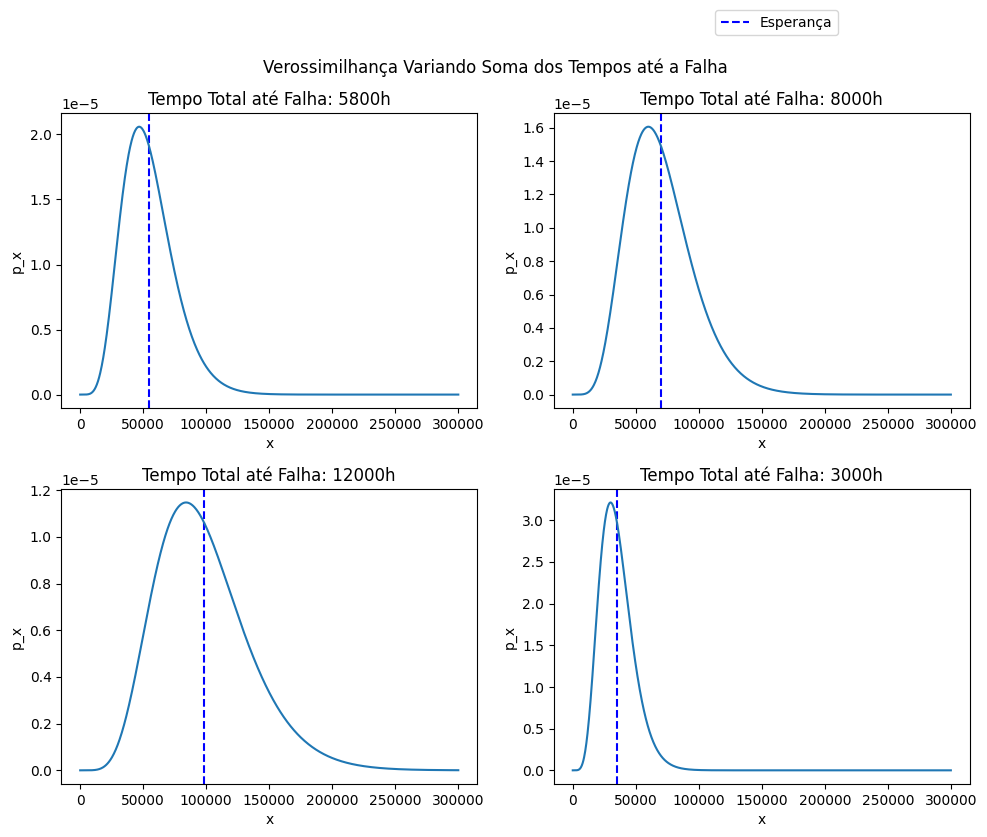

In [53]:
# Vendo as verossimilhanças variando numero de sucessos

n = 5

t = [800, 1200, 1200, 1500, 1100]

t_variando = [5800, 8000, 12000, 3000]

cols = [f'Verossimilhança com tempo total até a falha {i}h' for i in t_variando]

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 8))

cont_b = 0
for ax in axs.flatten():
    
    a = n+2
    b = 2000 + t_variando[cont_b]

    ax.axvline(x=a*b, color='b', linestyle='--', label='Esperança')
    ax.set_title(f'Tempo Total até Falha: {t_variando[cont_b]}h')

    x = np.linspace(0, 300000, 1000)
    y = gamma.pdf(x, a, scale=b)
    sns.lineplot(data = pd.DataFrame({'x':x,'p_x':y}), x = 'x', y = 'p_x', ax = ax)
    ax.legend_.remove() if hasattr(ax, 'legend_') and ax.legend_ else None

    cont_b += 1

fig.suptitle('Verossimilhança Variando Soma dos Tempos até a Falha')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=3, bbox_to_anchor=(0.85, 1))

plt.tight_layout()

## Aula Cancho - Estimadores Bayesianos por Perdas

### EB para Perda Quadrática

Definição: Seja $X = (X_1,..., X_n)$ amostra aleatória com função de verossimilhança $p(x|\theta)$ e $p(\theta)$ a distribuição a priori de $\theta$. Com relação à perda quadrática,
$$
L(\theta, a) = (\theta - a)^2
$$

O estimador de Bayes na classe de todas as funções de decisões é dada por

$$
G_{\beta}(x) = E(x|\theta)
$$

Demonstração: O risco de Bayes do procedimento $L$ é 

$$
r(L) = \int R(\theta, L) p(\theta) d\theta \,\,\,\,\,\,\,\,\,(1)
$$

Onde 
$$
R(\theta, L) = \int (\theta - L(x))^2 p(x|\theta) dx \,\,\,\,\,\,\,\,\,(2)
$$

Reescrevendo (1) temos

$$
r(L) = \int_{\theta} \int_x (\theta - L(x))^2 p(x|\theta) dx p(\theta) d\theta
$$

Note que $p(x|\theta)p(\theta) = p(\theta|x)p(x) = p(x,\theta)$ e, portanto

$$
r(L) = \int_x \text{(}\int_{\theta} (\theta - L(x))^2 p(\theta|x)  d\theta\text{  )}  \,p(x) dx\,\,\,\,\,\,\,\,\,(3)
$$

De $(3)$ definimos a perda a posteriori esperada

$$
P_x(L(x)) = \int_{\theta} (\theta - L(x))^2 p(\theta|x) d\theta
$$

Daí

$$
r(L) = \int_x \int_{\theta} P_x(L(x)) p(x) dx \,\,\,\,\,\,\,\,\,(4)
$$

Para minimizar $r(L)$ em $(4)$ basta, para cada x fixado, o que minimiza $P_x(a)$. 

Note 

$$
P_x(a) = \int_{\theta} (\theta^2 - 2a\theta + a^2) p(\theta|x) d\theta = \int_{\theta} \theta^2 p(\theta|x) d\theta  - 2a \int_{\theta} \theta  p(\theta|x) d\theta + a^2 \int_{\theta} p(\theta|x) d\theta = E_{\theta}(\theta^2) - 2aE(\theta) + a^2 
$$

Minimizando temos

$$
P'_x(a) = 2E_{\theta}(\theta) - 2a = 0 \rightarrow \hat{a} = E_{\theta}(\theta)
$$

Logo o estimador de Bayes para perda quadrática é

$$
G_{\theta} = E(x|\theta)
$$

### EB para Perda Absoluta

Definição: Seja $X = (X_1,..., X_n)$ amostra aleatória com função de verossimilhança $p(x|\theta)$ e $p(\theta)$ a distribuição a priori de $\theta$. Com relação à perda absoluta,
$$
L(\theta, a) = |\theta - a|
$$

O estimador de Bayes na classe de todas as funções de decisões é dada por

$$
G_{\theta}(x) = Mediana(x|\theta)
$$

Demonstração: O risco de Bayes do procedimento $L$ é 

$$
r(L) = \int R(\theta, L) p(\theta) d\theta \,\,\,\,\,\,\,\,\,(1)
$$

Onde 
$$
R(\theta, L) = \int |\theta - L(x)| p(x|\theta) dx \,\,\,\,\,\,\,\,\,(2)
$$

Reescrevendo (1) temos

$$
r(L) = \int_{\theta} \int_x |\theta - L(x)| p(x|\theta) dx p(\theta) d\theta
$$

Note que $p(x|\theta)p(\theta) = p(\theta|x)p(x) = p(x,\theta)$ e, portanto

$$
P_x(a) = \int_{-\infty}^{\infty} |\theta - a| p(x|\theta) d\theta = \int_{-\infty}^{a} (\theta - a) p(x|\theta) d\theta - \int_{a}^{\infty} (\theta - a) p(x|\theta) d\theta = \int_{-\infty}^{a} (\theta - a) p(x|\theta) d\theta - \int_{a}^{\infty} (\theta - a) p(x|\theta) d\theta 
$$

Minimizando em a temos

$$
P'_x(a) = \int_{-\infty}^{a} p(x|\theta) d\theta - \int_{a}^{\infty}p(x|\theta) d\theta =  F_{\theta|x}(a) - (1 - F_{\theta|x}(a)) = 0
$$

$$
2F_{\theta|x}(a) = 1 \rightarrow \hat{a} = \frac{F_{\theta|x}(a)}{2}
$$

Logo, o estimador de Bayes para perda absoluta é

$$
G_{\theta}(x) = Mediana(x|\theta)
$$

### EB para Perda 0-1

Definição: Seja $X = (X_1,..., X_n)$ amostra aleatória com função de verossimilhança $p(x|\theta)$ e $p(\theta)$ a distribuição a priori de $\theta$. Com relação à perda absoluta,
$$
L(\theta, a) = \begin{cases}
1, \text{ se } a\neq \theta \\
0, \text{ se } a = \theta
\end{cases}
$$

O estimador de Bayes na classe de todas as funções de decisões é dada por

$$
G_{\theta}(x) = Moda(x|\theta)
$$

Demonstração: 
$$
P_x(a) = 0.P(a = \theta|x) + 1.P(a \neq \theta|x) = P(a \neq \theta|x) = 1 - P(a = \theta|x)
$$

Logo,

$$
\hat{a} = arg_max P(\theta|x)
$$

O valor de $a$ que minimiza a perda a posteriori é o valor tal que $1 - P(a = \theta|x)$ é mínimo, ou seja, quando $P(a = \theta|x)$ atinge o máximo, que é a moda. Para obter, deve-se maximizar a densidade de probabilidade.

Ou seja, o estimador é o Estimador de Máxima a Posterior (MAP)

Logo, o estimador de Bayes para perda 0 - 1 é

$$
G_{\theta}(x) = Moda(x|\theta)
$$